In [104]:
import sqlite3
import pandas as pd

In [105]:
conn = sqlite3.connect('/Users/admin/Documents/Flatiron/dsc-phase-1-project-v2-4/im.db')

In [106]:
cur = conn.cursor()

In [107]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [108]:
cur.execute("""SELECT * FROM movie_basics;""")
cur.fetchall()
cur.description


(('movie_id', None, None, None, None, None, None),
 ('primary_title', None, None, None, None, None, None),
 ('original_title', None, None, None, None, None, None),
 ('start_year', None, None, None, None, None, None),
 ('runtime_minutes', None, None, None, None, None, None),
 ('genres', None, None, None, None, None, None))

In [109]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [110]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [111]:
pd.read_sql("""
SELECT DISTINCT movie_id 
FROM movie_ratings 
WHERE movie_id NOT IN 
    (SELECT DISTINCT movie_id 
    FROM movie_ratings); 
""", conn)

,movie_id


In [112]:
pd.read_sql("""
SELECT DISTINCT movie_id 
FROM movie_ratings 
WHERE movie_id NOT IN 
    (SELECT DISTINCT movie_id 
    FROM movie_ratings); 
""", conn)

,movie_id


In [113]:
pd.read_sql("""
SELECT movie_id 
FROM movie_ratings 
WHERE movie_id NOT IN 
    (SELECT movie_id 
    FROM movie_ratings); 
""", conn)

,movie_id


In [114]:
pd.read_sql("""
SELECT COUNT(movie_id)
FROM movie_ratings;
""", conn)

,COUNT(movie_id)
0,73856


In [115]:
pd.read_sql("""
SELECT COUNT(movie_id)
FROM movie_basics;
""", conn)

,COUNT(movie_id)
0,146144


In [116]:
pd.read_sql("""
SELECT DISTINCT COUNT(movie_id)
FROM movie_basics;
""", conn)

,COUNT(movie_id)
0,146144


In [117]:
pd.read_sql("""
SELECT DISTINCT COUNT(movie_id)
FROM movie_ratings;
""", conn)

,COUNT(movie_id)
0,73856


In [118]:
pd.read_sql("""
SELECT primary_title, averagerating
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
GROUP BY averagerating
HAVING numvotes > 20
""", conn)

,primary_title,averagerating
0,Clownfish,1.00
1,Loqueesha,1.10
2,Pinkerton ni aini iku,1.20
3,Amazing China,1.30
4,Namaste England,1.60
...,...,...
62,My Father from Haifa,8.60
63,Astralis - Institution,8.70
64,Borderless,8.90
65,The Boys Are Back - Bandstand: The Broadway Mu...,9.30


In [119]:
pd.read_sql("""
SELECT *
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
""", conn)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary
2,tt1042974,6.40,20,Just Inès,Just Inès,2010,90.00,Drama
3,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy"
4,tt1060240,6.50,21,Até Onde?,Até Onde?,2011,73.00,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.10,25,Caisa,Caisa,2018,84.00,Documentary
73852,tt9844256,7.50,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.00,"Action,Animation,Sci-Fi"
73853,tt9851050,4.70,14,Sisters,Sisters,2019,nan,"Action,Drama"
73854,tt9886934,7.00,5,The Projectionist,The Projectionist,2019,81.00,Documentary


In [120]:
pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [121]:
pd.read_sql("""
SELECT *
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
WHERE numvotes > 20
""", conn)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary
2,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy"
3,tt1060240,6.50,21,Até Onde?,Até Onde?,2011,73.00,"Mystery,Thriller"
4,tt1069246,6.20,326,Habana Eva,Habana Eva,2010,106.00,"Comedy,Romance"
...,...,...,...,...,...,...,...,...
49129,tt9691896,6.30,21,Out,Coming Out,2018,64.00,Documentary
49130,tt9768966,8.60,27,Plugged in,Plugged in,2019,53.00,Documentary
49131,tt9805820,8.10,25,Caisa,Caisa,2018,84.00,Documentary
49132,tt9844256,7.50,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.00,"Action,Animation,Sci-Fi"


In [122]:
combined = pd.read_sql("""
SELECT *
FROM movie_ratings as mr 
JOIN movie_basics as mb
    USING (movie_id)
""", conn)

In [123]:
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings 
""", conn)

In [124]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)

In [125]:
IMDB_rated_and_unrated = movie_ratings.join(movie_basics, lsuffix="_left", rsuffix="_right", how='outer')


In [126]:
IMDB_rated_and_unrated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id_left    73856 non-null   object 
 1   averagerating    73856 non-null   float64
 2   numvotes         73856 non-null   float64
 3   movie_id_right   146144 non-null  object 
 4   primary_title    146144 non-null  object 
 5   original_title   146123 non-null  object 
 6   start_year       146144 non-null  int64  
 7   runtime_minutes  114405 non-null  float64
 8   genres           140736 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 11.1+ MB


In [127]:
combined['original_title'].duplicated().value_counts()

False    71097
True      2759
Name: original_title, dtype: int64

In [128]:
pd.options.display.float_format = "{:.2f}".format

In [129]:
combined.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.00,73856.00,73856.00,66236.00
mean,6.33,3523.66,2014.28,94.65
std,1.47,30294.02,2.61,208.57
min,1.00,5.00,2010.00,3.00
25%,5.50,14.00,2012.00,81.00
50%,6.50,49.00,2014.00,91.00
75%,7.40,282.00,2016.00,104.00
max,10.00,1841066.00,2019.00,51420.00


In [130]:
#combined.drop(combined.loc[combined['numvotes'] > 50000].index, inplace=T

In [131]:
most_votes = combined.sort_values('numvotes', ascending=False)[:200]
most_votes.averagerating.mean()

7.458499999999999

In [132]:
combined.averagerating

0       8.30
1       8.90
2       6.40
3       4.20
4       6.50
        ... 
73851   8.10
73852   7.50
73853   4.70
73854   7.00
73855   6.30
Name: averagerating, Length: 73856, dtype: float64

In [133]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

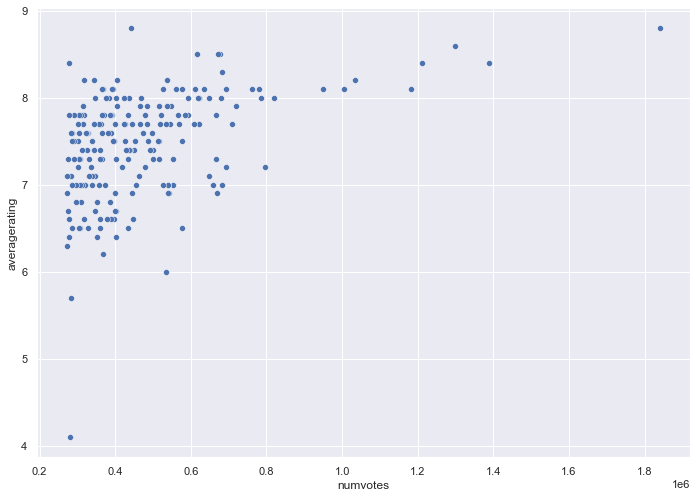

In [134]:
sns.scatterplot(x = 'numvotes', y = 'averagerating', data = most_votes)
plt.show()

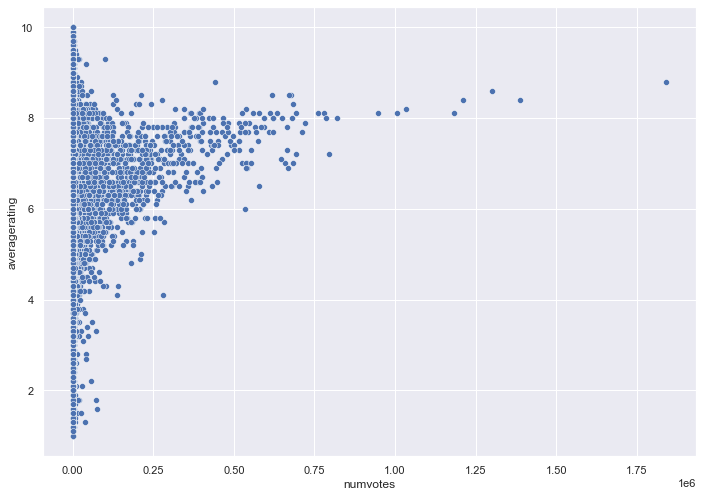

In [135]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x = 'numvotes', y = 'averagerating', data=combined)
plt.show()

In [136]:
combined['bin'] = pd.cut(combined['numvotes'], bins=range(0,1850000, 300000))


<AxesSubplot:xlabel='bin', ylabel='averagerating'>

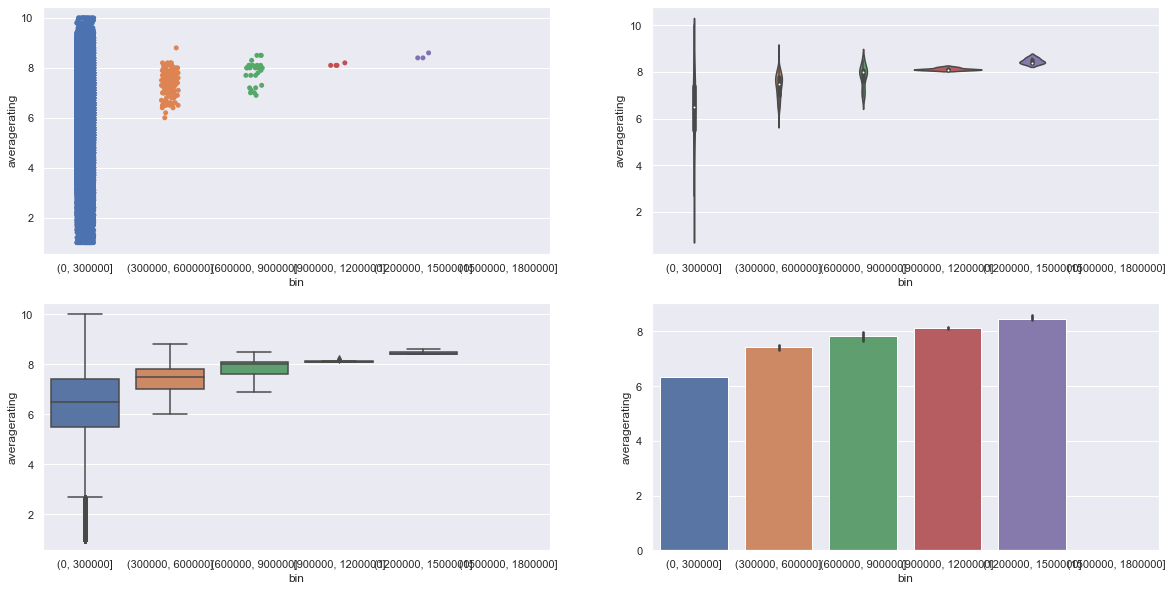

In [137]:
fig,ax = plt.subplots(2,2, figsize=(20,10))
ax=ax.flatten()
sns.stripplot(x='bin', y='averagerating', data=combined, ax=ax[0])
sns.violinplot(x='bin', y='averagerating', data=combined, ax=ax[1])
sns.boxplot(x='bin', y='averagerating', data=combined, ax=ax[2])
sns.barplot(x='bin', y='averagerating', data=combined, ax=ax[3])

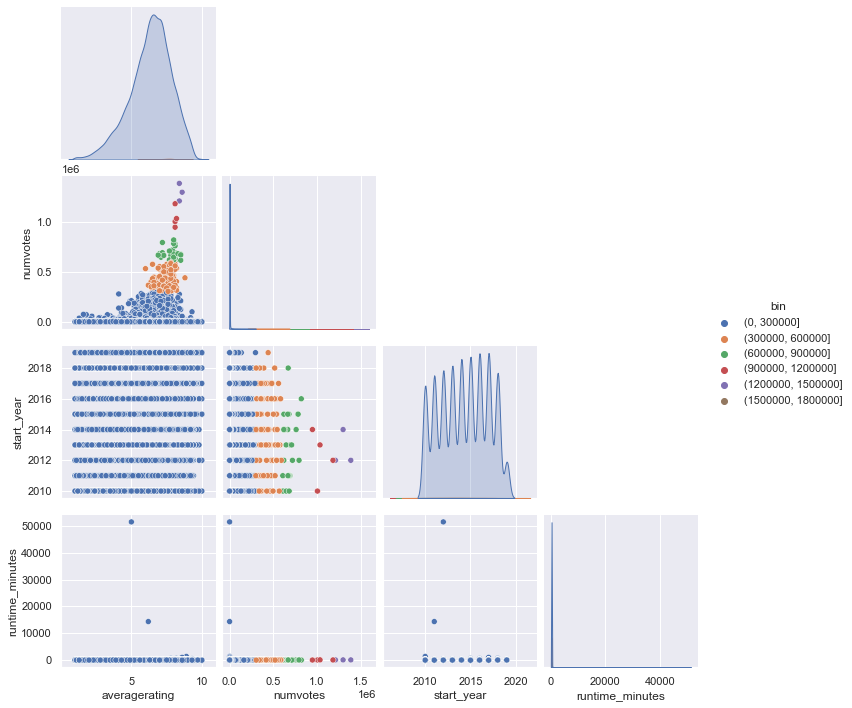

In [138]:
sns.pairplot(combined, hue='bin', corner = True)
plt.show()

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

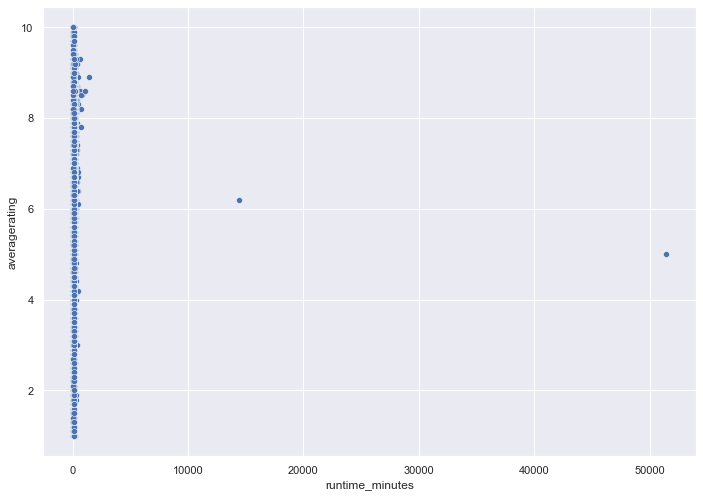

In [139]:
sns.scatterplot(x='runtime_minutes', y='averagerating', data=combined)

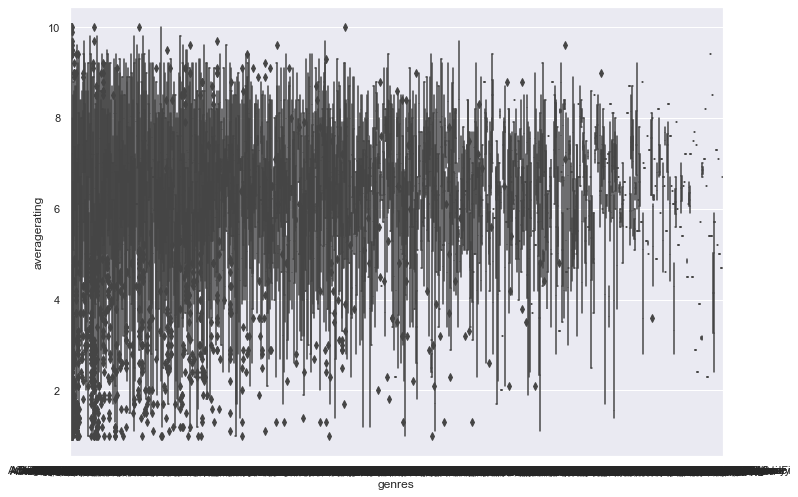

In [140]:
sns.boxplot(x='genres', y='averagerating', data=combined)
plt.show()

In [141]:
genres_combined = combined['genres'].str.split(',', expand = True)
genres_combined.dropna(inplace=True)


In [142]:
genres_joined = combined.join(genres_combined, how='outer')
genres_joined 


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,bin,0,1,2
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance,"(0, 300000]",NaN,NaN,NaN
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary,"(0, 300000]",NaN,NaN,NaN
2,tt1042974,6.40,20,Just Inès,Just Inès,2010,90.00,Drama,"(0, 300000]",NaN,NaN,NaN
3,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy","(0, 300000]",Action,Adventure,Fantasy
4,tt1060240,6.50,21,Até Onde?,Até Onde?,2011,73.00,"Mystery,Thriller","(0, 300000]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.10,25,Caisa,Caisa,2018,84.00,Documentary,"(0, 300000]",NaN,NaN,NaN
73852,tt9844256,7.50,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.00,"Action,Animation,Sci-Fi","(0, 300000]",Action,Animation,Sci-Fi
73853,tt9851050,4.70,14,Sisters,Sisters,2019,nan,"Action,Drama","(0, 300000]",NaN,NaN,NaN
73854,tt9886934,7.00,5,The Projectionist,The Projectionist,2019,81.00,Documentary,"(0, 300000]",NaN,NaN,NaN


In [143]:
praveen_df = genres_joined.copy()

In [144]:
praveen_df = genres_joined.drop(columns = [0,1,2])


In [145]:
praveen_df['genre_list'] = praveen_df.genres.str.split(",")

praveen_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,bin,genre_list
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance,"(0, 300000]",[Romance]
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary,"(0, 300000]",[Documentary]
2,tt1042974,6.40,20,Just Inès,Just Inès,2010,90.00,Drama,"(0, 300000]",[Drama]
3,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy","(0, 300000]","[Action, Adventure, Fantasy]"
4,tt1060240,6.50,21,Até Onde?,Até Onde?,2011,73.00,"Mystery,Thriller","(0, 300000]","[Mystery, Thriller]"
...,...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.10,25,Caisa,Caisa,2018,84.00,Documentary,"(0, 300000]",[Documentary]
73852,tt9844256,7.50,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.00,"Action,Animation,Sci-Fi","(0, 300000]","[Action, Animation, Sci-Fi]"
73853,tt9851050,4.70,14,Sisters,Sisters,2019,nan,"Action,Drama","(0, 300000]","[Action, Drama]"
73854,tt9886934,7.00,5,The Projectionist,The Projectionist,2019,81.00,Documentary,"(0, 300000]",[Documentary]


In [146]:
exploded_praveen = praveen_df.explode('genre_list')
exploded_praveen

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,bin,genre_list
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance,"(0, 300000]",Romance
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary,"(0, 300000]",Documentary
2,tt1042974,6.40,20,Just Inès,Just Inès,2010,90.00,Drama,"(0, 300000]",Drama
3,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy","(0, 300000]",Action
3,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy","(0, 300000]",Adventure
...,...,...,...,...,...,...,...,...,...,...
73852,tt9844256,7.50,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.00,"Action,Animation,Sci-Fi","(0, 300000]",Sci-Fi
73853,tt9851050,4.70,14,Sisters,Sisters,2019,nan,"Action,Drama","(0, 300000]",Action
73853,tt9851050,4.70,14,Sisters,Sisters,2019,nan,"Action,Drama","(0, 300000]",Drama
73854,tt9886934,7.00,5,The Projectionist,The Projectionist,2019,81.00,Documentary,"(0, 300000]",Documentary


In [ ]:
exploded_praveen[['numvotes', 'genre_list']].groupby('genre_list').mean()

In [88]:
genres_joined['genre_list'] = genres_joined.genres.str.split(",")

In [87]:
genres_joined.drop(columns = [0,1,2], inplace=True)

In [89]:
exploded_genres_combined = genres_joined.explode('genre_list')

In [100]:
exploded_genres_combined[['averagerating', 'genre_list']].groupby('genre_list').mean().sort_values(by='averagerating')

,averagerating
genre_list,
Adult,3.77
Horror,5.00
Sci-Fi,5.49
Thriller,5.64
Action,5.81
Western,5.87
Fantasy,5.92
Mystery,5.92
Comedy,6.00


In [ ]:
#checking to see if genres correspond to BOM database
combined.loc[combined['primary_title'] == 'The Extra Man']

In [ ]:
sns.pairplot(exploded_genres_combined, hue='genre_list', corner = True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8,12))
sns.boxplot(x='averagerating', y='genre_list', data=exploded_genres_combined)
plt.show()

In [ ]:
sns.barplot(x = 'averagerating', y = 'genre_list', data = exploded_genres_combined)
plt.show()

In [ ]:
combined['genres'].isnull().value_counts()



In [ ]:
null_genres = combined.loc[combined['genres'].isnull()]
null_genres

In [ ]:
null_genres.averagerating.mean()

In [ ]:
null_genres.describe()
# since null genres has relatively low number of votes (max being 1200), these seem to be not
# terribly popular movies and probably don't correlate well with box office numbers. their mean
# rating is comparable to the whole imdb mean, though, and rating has something do with popularity!

In [ ]:
combined.describe()

In [ ]:
imdb_genre_test = set(exploded_genres_combined['genre_list'])

tm_genres = set(tm_genres)
imdb_genre_test

In [ ]:
tm_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',         
'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']   

In [ ]:
imdb_list = list(imdb_genre_test)
imdb_list_filtered =  filter(lambda item: item is not None, l1_list)
imdb_sorted = sorted(imdb_list_filtered)
tmdb_sorted = sorted(tm_genres)


In [ ]:
def checked(list1, list2):
    genres = []
    for i in list1:
        if i in list2:
            genres.append(i)
        else:
            pass
    return genres  

test = checked(imdb_sorted, tmdb_sorted)

test


In [ ]:
len(test)

In [ ]:
len(imdb_sorted)


In [ ]:
tmdb = pd.read_csv('/Users/admin/Documents/Flatiron/Movie_Production_Recommendations/data/tmdb.movies.csv')

In [ ]:
len(tmdb_sorted)

In [ ]:
tmdb.info()
# getting genre column name

In [ ]:
bom = pd.read_csv('/Users/admin/Documents/Flatiron/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz')
bom.info()
# doesn't have genre

In [ ]:
combined.to_csv("/Users/admin/Documents/Flatiron/Movie_Production_Recommendations/Lou/IMDB_rated_only.csv")

In [ ]:
IMDB_rated_and_unrated.to_csv("/Users/admin/Documents/Flatiron/Movie_Production_Recommendations/Lou/IMDB_rated_and_unrated.csv")

In [ ]:
pwd